In [1]:
import os
import numpy as np
import h5py
from matplotlib import pyplot as plt

# PRIYA - Data Loading

In [2]:
# pre-stored position file
ppos = np.load("data/ppos_lr_sightline_20mpc.npy")

In [3]:
Lbox = 120000 # Boxsize: 120 Mpc

# 120 Mpc, 20 Mpc, 20 Mpc
Lx, Ly, Lz = Lbox, 20000, 20000

center = np.array([0.5 * Lbox, 40000, 40000])

# reposition the particles to the original part locations
ppos += center

In [4]:
ppos[:, 0].max(), ppos[:, 0].min(), ppos[:, 1].max(), ppos[:, 1].min(), ppos[:, 2].max(), ppos[:, 2].min()

(119999.99, 0.00390625, 49999.996, 30000.002, 49999.996, 30000.002)

## Find DLA sightlines within my limited data

In [5]:
# base_dir = "/bigdata/birdlab/shared/Lya_emu_spectra/emu_full/"
base_dir = "../lya_corr_attention_filter/data"
simulation_dir = "ns0.803Ap2.2e-09herei4.05heref2.67alphaq2.21hub0.735omegamh20.141hireionz7.17bhfeedback0.056"

# pointing to the spectra folder
snapshot_num = 23

spectra_file = os.path.join(
    base_dir,
    simulation_dir,
    "output",
    "SPECTRA_023",
    "lya_forest_spectra_grid_480.hdf5",
)

In [6]:
# Read one spectrum
with h5py.File(spectra_file, "r") as f:
    print(f.keys())
    print(f["Header"].keys())  # Empty
    print(f["tau/H/1/1215"].shape)  # Shape

    axis = f["spectra/axis"][
        :
    ]  # Axis = (1: x direction; 2: y direction; 3: z direction)
    cofm = f["spectra/cofm"][:]  # Center of mass

    print(f["temperature"])  # Empty
    tau = f["tau/H/1/1215"][:]  # The optical depth of the spectra

<KeysViewHDF5 ['Header', 'colden', 'density_weight_density', 'num_important', 'spectra', 'tau', 'tau_obs', 'temperature', 'velocity']>
<KeysViewHDF5 []>
(691200, 1114)
<HDF5 group "/temperature" (0 members)>


In [22]:
# only select the spectra within my limited data
cofm.shape
# x, y, z

# only select the sightlines from x directions
ind = cofm[:, 0] == 0

# within the limited box
ind &= cofm[:, 1] < (center[1] + Ly * 0.5)
ind &= cofm[:, 1] > (center[1] - Ly * 0.5)
ind &= cofm[:, 2] < (center[2] + Lz * 0.5)
ind &= cofm[:, 2] > (center[2] - Lz * 0.5)

print("Total sightlines within my limited data:", ind.sum())

Total sightlines within my limited data: 6241


In [25]:
# selected sightlines
tau_selected = tau[ind, :]
cofm_selected = cofm[ind, :]

cofm_selected.shape, tau_selected.shape

((6241, 3), (6241, 1114))

In [29]:
# Find DLAs
ind = np.any(tau_selected > 10**6, axis=1)
dla_specs = np.where(ind)[0]
dla_specs

array([  14,   21,  136,  182,  187,  202,  272,  292,  326,  427,  519,
        544,  562,  604,  676,  697,  731,  745,  751,  764,  827,  884,
        901, 1066, 1117, 1193, 1237, 1300, 1309, 1312, 1402, 1569, 1590,
       1651, 1655, 1686, 1690, 1710, 1720, 1770, 1801, 2014, 2070, 2085,
       2101, 2125, 2181, 2215, 2229, 2251, 2256, 2257, 2369, 2387, 2396,
       2435, 2450, 2483, 2500, 2575, 2581, 2660, 2689, 2731, 2751, 2840,
       2856, 2874, 2881, 2936, 2947, 2950, 2953, 2984, 2999, 3002, 3005,
       3008, 3151, 3220, 3257, 3287, 3288, 3295, 3296, 3307, 3328, 3346,
       3458, 3483, 3505, 3518, 3555, 3556, 3566, 3604, 3609, 3639, 3658,
       3671, 3681, 3839, 3918, 3919, 3956, 3967, 3980, 3997, 4076, 4133,
       4182, 4206, 4227, 4236, 4259, 4273, 4305, 4314, 4377, 4436, 4519,
       4524, 4603, 4628, 4710, 4856, 4867, 4924, 4984, 5102, 5175, 5222,
       5332, 5353, 5388, 5459, 5486, 5548, 5624, 5831, 5865, 6008, 6022,
       6051, 6089, 6091, 6103, 6123, 6162, 6210, 62

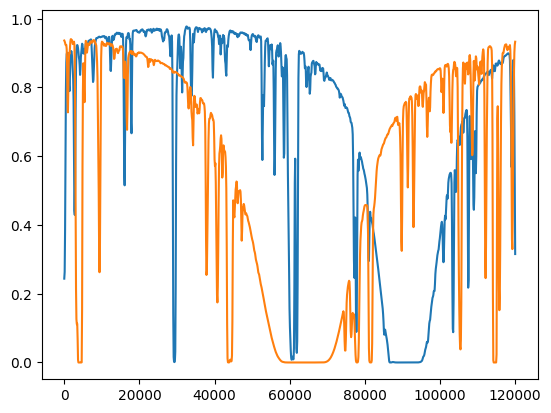

In [38]:
# One spectrum optical depth
# DLA
i = 0

spec = dla_specs[i]

x = np.linspace(0, Lbox, tau_selected[spec, :].shape[0])

flux = np.exp(-tau_selected[spec, :])
plt.plot(x, flux)
# plt.vline()

# 2 DLA
i = 2
spec = dla_specs[i]
flux = np.exp(-tau_selected[spec, :])
plt.plot(x, flux)
# plt.vline()

## Plot projected DLA

In [ ]:
dla_center = [60000., 30500., 44500.]

In [37]:
cofm_selected[dla_specs[2]]

array([    0., 30500., 44500.])

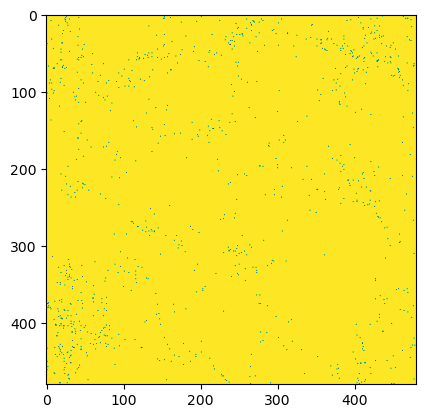

In [80]:
# Visualize one pixel in the spectra
# roughly ~25 Mpc in x
tau_grid = tau[ind_axis, :100].sum(axis=1)
ind_dla = tau_grid > 10**6
tau_grid[~ind_dla] = 0

plt.imshow( np.exp(-tau_grid).reshape(480, 480) )
# plt.savefig("sightlines.png", format="png", dpi=150, transparent=True);

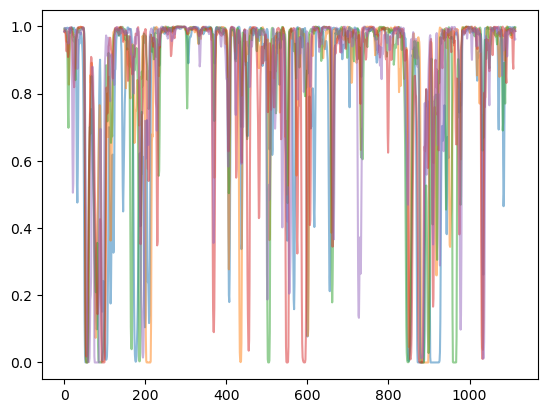

In [8]:
# Plot the fluxes from the first 5 spectra
plt.plot(np.exp(-tau[0:5, :]).T, alpha=0.5)

In [9]:
# Axis shows the directions of the spectra
axis

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [10]:
# Center of mass in kpc
cofm[:10]

array([[   0.,    0.,    0.],
       [   0.,    0.,  250.],
       [   0.,    0.,  500.],
       [   0.,    0.,  750.],
       [   0.,    0., 1000.],
       [   0.,    0., 1250.],
       [   0.,    0., 1500.],
       [   0.,    0., 1750.],
       [   0.,    0., 2000.],
       [   0.,    0., 2250.]])

In [11]:
# Convert optical depth to flux
flux = np.exp(-tau)

In [12]:
# image
np.sqrt(sum(axis == 1))

480.0

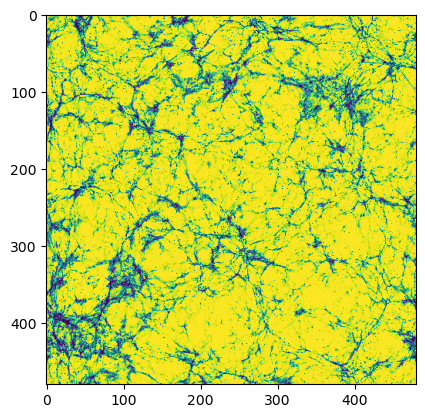

In [13]:
# Visualize one pixel in the spectra
plt.imshow(flux[axis == 1, 0].reshape(480, 480))
plt.savefig("sightlines.png", format="png", dpi=150, transparent=True);

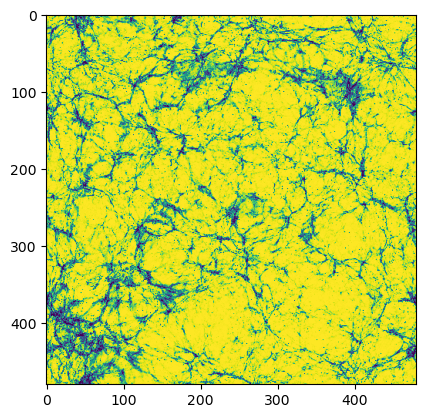

In [15]:
# Visualize one pixel in the spectra
plt.imshow(flux[axis == 1, 10].reshape(480, 480))

## Dataloader

In [19]:
class LyaSpectra:

    """
    A Data holder of simulated Lya sightlines from one simulation.
    """

    def __init__(
        self,
        base_dir="../data/",
        simulation_dir="ns0.803Ap2.2e-09herei4.05heref2.67alphaq2.21hub0.735omegamh20.141hireionz7.17bhfeedback0.056",
        # pointing to the spectra folder
        snapshot_num=23,
    ):
        # Specify the snapshot number instead of just use a path of the filename -
        # This is to prevent bad behavior in the future since there's almost no simulation information stored in the
        # spectra hdf5 file, so users must know what simulation they are using.
        self.spectra_file = os.path.join(
            base_dir,
            simulation_dir,
            "output",
            "SPECTRA_{}".format(str(snapshot_num).zfill(3)),
            "lya_forest_spectra_grid_480.hdf5",
        )

        # Read one spectrum
        with h5py.File(self.spectra_file, "r") as f:
            print("[Info] Keys in the file:", f.keys())
            print("[Info] Header:", f["Header"].keys())
            print("[Info] Shape of the tau:", f["tau/H/1/1215"].shape)  # Shape

            self._axis = f["spectra/axis"][
                :
            ]  # Axis = (1: x direction; 2: y direction; 3: z direction)
            self._cofm = f["spectra/cofm"][:]  # Center of mass

            self._tau = f["tau/H/1/1215"][:]  # The optical depth of the spectra

        print("[Info] Convert optical depth tau to flux ...")
        self._flux = np.exp(-self._tau)
        print("done.")

    @property
    def axis(self):
        """
        Axis of the sightline directions, (1: x direction; 2: y direction; 3: z direction),
        Sightlines always parallel to the x,y,or z direction, so this describes the
        parallel direction of the sightlines.
        """
        return self._axis

    @property
    def cofm(self):
        """
        Center of the mass of the sightline, in the format of
            [number of sightlines, number of sightline directions (x, y, z)]
        """
        return self._cofm

    @property
    def flux(self):
        """
        Flux of the simulated Lya forest, range from (0, 1), 0 for completely absorbed.
            (number of sightlines, number of pixels in each sightlines)
        """
        return self._flux

    @property
    def tau(self):
        """
        Optical depth of the simulated Lya forest, -log(flux).
            (number of sightlines, number of pixels in each sightlines)
        """
        return self._tau

In [20]:
lya_spectra = LyaSpectra(
    base_dir="../data",
    simulation_dir="ns0.803Ap2.2e-09herei4.05heref2.67alphaq2.21hub0.735omegamh20.141hireionz7.17bhfeedback0.056",
    snapshot_num=23,
)

[Info] Keys in the file: <KeysViewHDF5 ['Header', 'colden', 'density_weight_density', 'num_important', 'spectra', 'tau', 'tau_obs', 'temperature', 'velocity']>
[Info] Header: <KeysViewHDF5 []>
[Info] Shape of the tau: (691200, 1114)
[Info] Convert optical depth tau to flux ...
done.
